In [86]:
import os
import matplotlib.pyplot as plt
import glob
import json

In [87]:
path = "Mini_BAGLS_dataset" 

In [88]:
files = os.listdir(path)

In [89]:
filenames = [f for f in files if '.meta' in f]

In [90]:
for idx, f in enumerate(filenames):
    print(idx)
    if idx == 5:
        break;
    print(f)

0
0.meta
1
1.meta
2
10.meta
3
11.meta
4
12.meta
5


In [91]:
filenames

['0.meta',
 '1.meta',
 '10.meta',
 '11.meta',
 '12.meta',
 '13.meta',
 '14.meta',
 '15.meta',
 '16.meta',
 '17.meta',
 '18.meta',
 '19.meta',
 '2.meta',
 '20.meta',
 '21.meta',
 '22.meta',
 '23.meta',
 '24.meta',
 '25.meta',
 '26.meta',
 '27.meta',
 '28.meta',
 '29.meta',
 '3.meta',
 '30.meta',
 '31.meta',
 '32.meta',
 '33.meta',
 '34.meta',
 '35.meta',
 '36.meta',
 '37.meta',
 '38.meta',
 '39.meta',
 '4.meta',
 '40.meta',
 '41.meta',
 '42.meta',
 '43.meta',
 '44.meta',
 '45.meta',
 '46.meta',
 '47.meta',
 '48.meta',
 '49.meta',
 '5.meta',
 '50.meta',
 '51.meta',
 '52.meta',
 '53.meta',
 '54.meta',
 '55.meta',
 '56.meta',
 '57.meta',
 '58.meta',
 '59.meta',
 '6.meta',
 '60.meta',
 '61.meta',
 '62.meta',
 '63.meta',
 '64.meta',
 '65.meta',
 '66.meta',
 '67.meta',
 '68.meta',
 '69.meta',
 '7.meta',
 '70.meta',
 '71.meta',
 '72.meta',
 '73.meta',
 '74.meta',
 '75.meta',
 '76.meta',
 '77.meta',
 '78.meta',
 '79.meta',
 '8.meta',
 '80.meta',
 '81.meta',
 '82.meta',
 '83.meta',
 '84.meta',
 

In [92]:
import imageio.v3 as io
from PIL import Image
import skimage
import cv2
import random

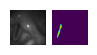

{
    "Video Id": 627,
    "Camera": "HERS 5562 Endocam Wolf",
    "Sampling rate (Hz)": 4000,
    "Video resolution (px, HxW)": [
        256,
        256
    ],
    "Color": false,
    "Endoscope orientation": "90\u00b0",
    "Endoscope application": "oral",
    "Age range (yrs)": "20-30",
    "Subject sex": "w",
    "Subject disorder status": "Muscle tension dysphonia",
    "Segmenter": 0,
    "Post-processed": 1
}


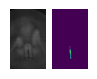

{
    "Video Id": 131,
    "Camera": "Phantom v210",
    "Sampling rate (Hz)": 3000,
    "Video resolution (px, HxW)": [
        352,
        208
    ],
    "Color": false,
    "Endoscope orientation": null,
    "Endoscope application": "",
    "Age range (yrs)": "",
    "Subject sex": "",
    "Subject disorder status": "",
    "Segmenter": 1,
    "Post-processed": 2
}


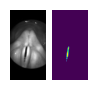

{
    "Video Id": 277,
    "Camera": "KayPentax HSV 9710 (Photron)",
    "Sampling rate (Hz)": 4000,
    "Video resolution (px, HxW)": [
        512,
        256
    ],
    "Color": false,
    "Endoscope orientation": "70\u00b0",
    "Endoscope application": "oral",
    "Age range (yrs)": "",
    "Subject sex": "w",
    "Subject disorder status": "healthy",
    "Segmenter": 0,
    "Post-processed": 1
}


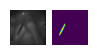

{
    "Video Id": 139,
    "Camera": "HERS 5562 Endocam Wolf",
    "Sampling rate (Hz)": 4000,
    "Video resolution (px, HxW)": [
        256,
        256
    ],
    "Color": false,
    "Endoscope orientation": "90\u00b0",
    "Endoscope application": "oral",
    "Age range (yrs)": "30-40",
    "Subject sex": "w",
    "Subject disorder status": "Muscle tension dysphonia",
    "Segmenter": 0,
    "Post-processed": 1
}


In [93]:
for f in random.choices(glob_filenames, k = 4):
    basename = os.path.basename(f)
    name = basename.split(".")[0]
    img_path = os.path.join(path,name + ".png")
    seg_path = os.path.join(path,name + "_seg.png")
    meta_path = os.path.join(path,name + ".meta")
    img = io.imread(img_path)
    seg = io.imread(seg_path)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(1, 1))
    ax1.axis("off"); ax2.axis("off")
    ax1.imshow(img);ax2.imshow(seg) 
    plt.show()
    with open(meta_path) as f:
        contents = f.read()
        print(contents)
    

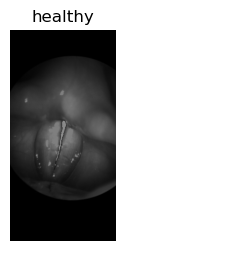

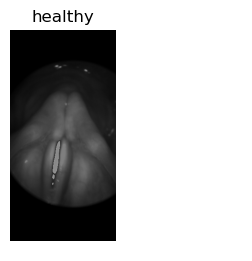

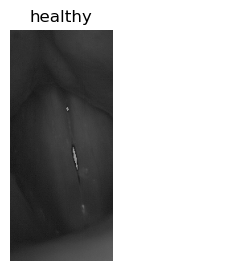

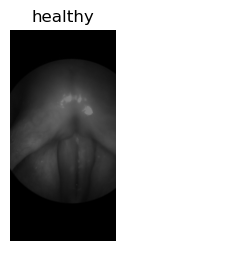

In [113]:
for idx, f in enumerate(glob_filenames):
    # make sure to only look at the first 5 samples and not all 2000 of them
    if idx == 4:
        break
    basename = os.path.basename(f)
    name = basename.split(".")[0]
    img_path = os.path.join(path,name + ".png")
    seg_path = os.path.join(path,name + "_seg.png")
    meta_path = os.path.join(path,name + ".meta")
    
    img = io.imread(img_path)
    seg = io.imread(seg_path)
    background = Image.fromarray(img)
    overlay = Image.fromarray(seg)
    background = background.convert("RGBA")
    overlay = overlay.convert("RGBA")
    new_img = Image.blend(background, overlay, 0.5)
    
    meta_file = open(f)
    meta_data = json.load(meta_file)
    df = pd.DataFrame(meta_data)
    
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(3, 3))
    ax1.axis("off"); ax2.axis("off")
    ax1.imshow(new_img);
    ax1.set_title(df.iloc[0][9])
    plt.show()


In [101]:
import numpy as np

background = Image.fromarray(img)
overlay = Image.fromarray(seg)

background = background.convert("RGBA")
overlay = overlay.convert("RGBA")

new_img = Image.blend(background, overlay, 0.5)
new_img.save("new.png","PNG")

In [102]:
imshow(new.png)

NameError: name 'imshow' is not defined

In [224]:
basename

'65.meta'

In [79]:
import glob
glob_filenames = glob.glob(path + "/*.meta") #use path from the pathlib library then concatenate with path. /* to get all meta files
#glob.glob(str(path_pathlib / "*.meta"))       using pathlib libraryy

In [83]:
import pandas as pd

# get all meta data information 
#all_meta_data = []

for f in glob_filenames:
    # open .meta file
    meta_file = open(f)
    meta_data = json.load(meta_file)
    df = pd.DataFrame(meta_data)
    break

NameError: name 'json' is not defined

In [84]:
meta_data

NameError: name 'meta_data' is not defined

In [283]:
print(df.iloc[0])

Video Id                                               104
Camera                        KayPentax HSV 9710 (Photron)
Sampling rate (Hz)                                    4000
Video resolution (px, HxW)                             512
Color                                                False
Endoscope orientation                                  70°
Endoscope application                                 oral
Age range (yrs)                                      50-60
Subject sex                                              w
Subject disorder status                            healthy
Segmenter                                                0
Post-processed                                           2
Name: 0, dtype: object


In [103]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img_path = 'leaves.jpg'
img = cv2.imread(img_path)

In [104]:
#fix_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#print(img.shape)

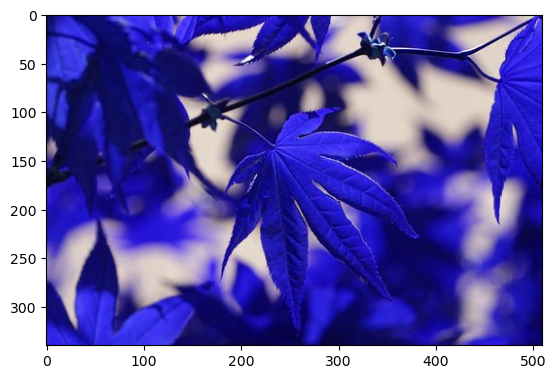

In [105]:
plt.imshow(fix_img)
plt.imshow(img)

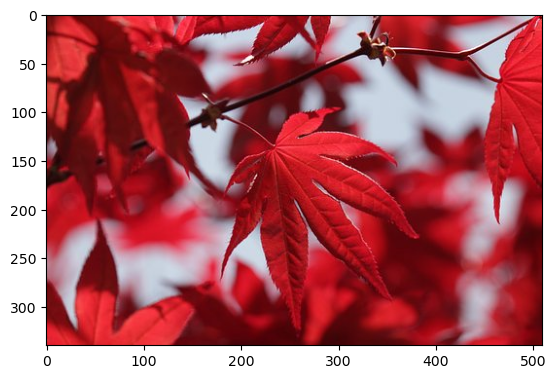

In [106]:
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb, cmap = plt.cm.Spectral)

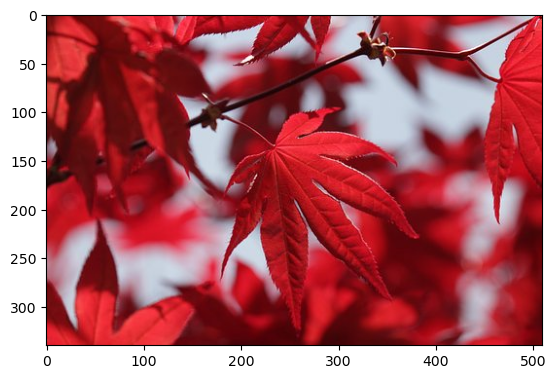

In [14]:
fix_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(fix_img)

In [15]:
R, G, B = fix_img[:,:,0], fix_img[:,:,1],fix_img[:,:,2]

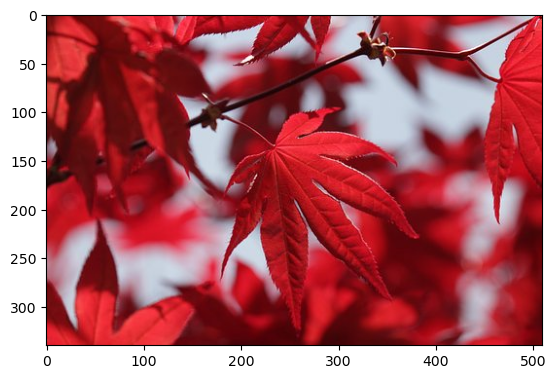

In [17]:
plt.imshow(fix_img)

[[ 43.8993  42.8994  42.8285 ...  88.8678  99.8264 107.2431]
 [ 42.8994  42.8994  42.8285 ... 110.1861  88.7735  98.6522]
 [ 42.7854  41.7855  43.1875 ...  68.9559  39.6119  74.7161]
 ...
 [ 95.7962  96.7961  96.7961 ...  35.6444  38.242   38.9538]
 [ 92.7965  93.7964  93.7964 ...  35.6444  38.242   39.9537]
 [ 93.7964  94.7963  94.7963 ...  36.6443  39.2419  40.9536]]


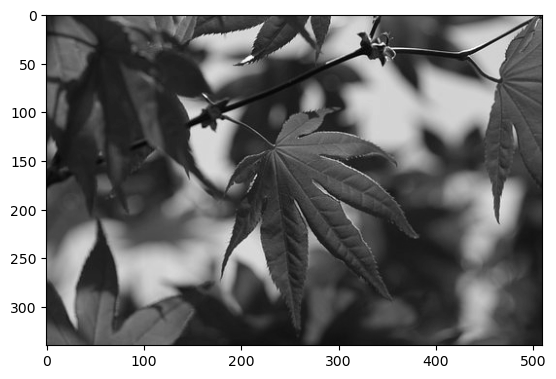

In [29]:
Y = 0.2989 * R + 0.5870 * G + 0.1140 * B
print(Y)
plt.imshow(Y, cmap='gray')
plt.savefig('luminosity_method.png')

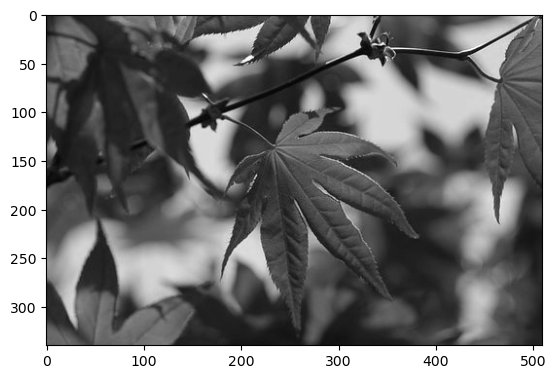

In [30]:
average_img = np.mean(fix_img, axis=2)
# (axis=0 would average across pixel rows and axis=1 would average across pixel columns.)
plt.imshow(average_img, cmap='gray')
plt.savefig('average_method.png')

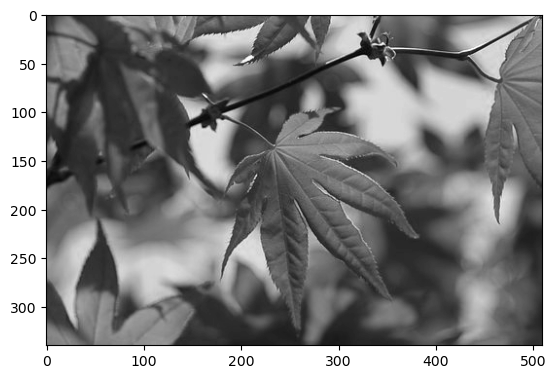

In [44]:
lightness_img = np.max(fix_img, axis=-1)/2 + np.min(fix_img,axis=-1)/2
plt.imshow(lightness_img, cmap='gray')
plt.savefig('lightness.png')

(-0.5, 509.5, 339.5, -0.5)

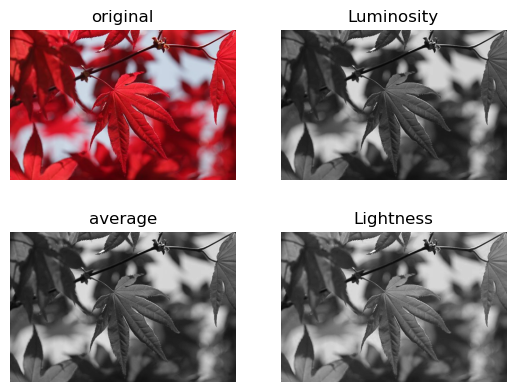

In [61]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(fix_img)
axarr[0,0].set_title("original")
axarr[0,0].axis('off')

axarr[0,1].imshow(Y, cmap='gray')
axarr[0,1].set_title("Luminosity")
axarr[0,1].axis('off')

axarr[1,0].imshow(average_img, cmap='gray')
axarr[1,0].set_title("average")
axarr[1,0].axis('off')

axarr[1,1].imshow(lightness_img, cmap='gray')
axarr[1,1].set_title("Lightness")
axarr[1,1].axis('off')

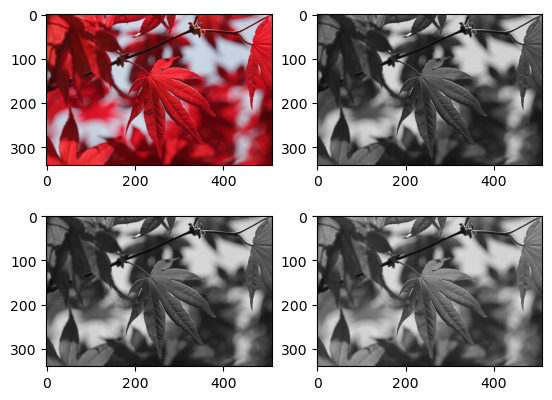

In [64]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(fix_img)

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(Y, cmap='gray')

ax3 = fig.add_subplot(2,2,3)
ax3.imshow(average_img, cmap='gray')

ax4 = fig.add_subplot(2,2,4)
ax4.imshow(lightness_img, cmap='gray')